You have been given a dataset comprising of 27305 facial images that are labeled based on age, gender, and ethnicity. Your task is to build three distinct Convolutional Neural Network (CNN) models to predict the gender, ethnicity, and age of individuals in the images.

To start, you will need to preprocess the data by casting the pixel values to a NumPy array and then reshaping it to the original size of the images, which is 48x48x1. It is also advisable to explore the dataset before building any models. You can do this by visualizing feature distributions and examining examples of the dataset. This exploration process can help you identify any anomalies in the dataset, understand its characteristics, and guide your choice of CNN architecture.

Once you have preprocessed the data and explored the dataset, you can start building the CNN models. For each task, you will need to select the appropriate loss function and metrics. For instance, binary cross-entropy can be used for gender classification, categorical cross-entropy can be used for ethnicity classification, and mean absolute error or mean squared error can be used for age regression.

In addition to the techniques you learned in previous units, it is crucial to tune your model's hyperparameters, such as the learning rate, number of filters, and kernel size. It is also advisable to use a validation set in addition to the train and test sets to monitor your model's performance and prevent overfitting.

Finally, after training and testing your models on the dataset, it is a good practice to test the models on some images of your choice. This step can help you gain insights into the model's strengths and weaknesses, and identify areas for improvement.

Dataset

Link to the dataset : https://drive.google.com/file/d/1Q0gh-UF-BQFfLdQ3VjwU5pSWVu0nWCmj/view?usp=sharing

1. Import and process data

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming 'images' is your preprocessed dataset and 'data' contains the labels

# Convert target variables to appropriate types
y_gender = data['gender'].values  # Gender labels
y_ethnicity = data['ethnicity'].values  # Ethnicity labels (make sure these are categorical)
y_age = data['age'].values  # Age labels (regression)

# Split the dataset for each target (gender, ethnicity, and age)
X_train, X_test, y_train_gender, y_test_gender = train_test_split(images, y_gender, test_size=0.2, random_state=42)
_, _, y_train_ethnicity, y_test_ethnicity = train_test_split(images, y_ethnicity, test_size=0.2, random_state=42)
_, _, y_train_age, y_test_age = train_test_split(images, y_age, test_size=0.2, random_state=42)

# Encode ethnicity labels for multi-class classification (if not already encoded)
from tensorflow.keras.utils import to_categorical
y_train_ethnicity = to_categorical(y_train_ethnicity, num_classes=len(np.unique(y_ethnicity)))
y_test_ethnicity = to_categorical(y_test_ethnicity, num_classes=len(np.unique(y_ethnicity)))

# Normalize the image data (0-255 -> 0.0 - 1.0)
X_train = X_train / 255.0
X_test = X_test / 255.0


2. Data exploration

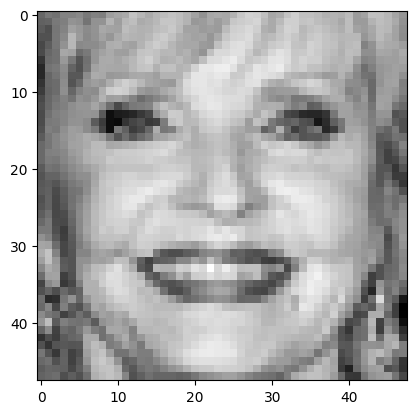

In [23]:
import matplotlib.pyplot as plt

# Visualize an image from the dataset
plt.imshow(X_train[0].reshape(48, 48), cmap='gray')
plt.show()


3. Building CNN

In [24]:
# Model 1: Gender Classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the CNN model for Gender Prediction
def build_gender_model():
    model = Sequential()

    # First convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output for the fully connected layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

    # Compile the model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [25]:
#Model 2: Ethnicity Classification

def build_ethnicity_model():
    model = Sequential()

    # First convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output for the fully connected layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(data['ethnicity'].unique()), activation='softmax'))  # Softmax for multi-class classification

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model



In [26]:
# Model 3: Age Regression

def build_age_model():
    model = Sequential()

    # First convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output for the fully connected layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # Linear output for regression

    # Compile the model
    model.compile(optimizer=Adam(), loss='mean_absolute_error', metrics=['mae'])
    return model


4. Hyperparameter Tuning and Model Training

In [ ]:
import keras_tuner as kt

# Hyperparameter tuning function
def model_builder(hp):
    model = Sequential()

    # First convolutional layer with tunable number of filters
    model.add(Conv2D(
        hp.Int('filters_1', min_value=32, max_value=128, step=32),
        (3, 3),
        activation='relu',
        input_shape=(48, 48, 1)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer
    model.add(Conv2D(
        hp.Int('filters_2', min_value=64, max_value=256, step=64),
        (3, 3),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output for the fully connected layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Change for different tasks (e.g., softmax for ethnicity)

    # Compile the model with tunable learning rate
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Create a tuner to search the best hyperparameters
tuner = kt.RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    directory='project_dir',
    project_name='gender_model_tuning'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train_gender, epochs=10, validation_data=(X_test, y_test_gender))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
128               |128               |filters_1
128               |128               |filters_2
0.0010407         |0.0010407         |learning_rate

Epoch 1/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 264s 441ms/step - accuracy: 0.5196 - loss: 0.6925 - val_accuracy: 0.5206 - val_loss: 0.6924
Epoch 2/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 262s 441ms/step - accuracy: 0.5235 - loss: 0.6921 - val_accuracy: 0.5206 - val_loss: 0.6923
Epoch 3/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 260s 437ms/step - accuracy: 0.5211 - loss: 0.6924 - val_accuracy: 0.5206 - val_loss: 0.6923
Epoch 4/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 265s 442ms/step - accuracy: 0.5237 - loss: 0.6922 - val_accuracy: 0.5206 - val_loss: 0.6923
Epoch 5/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 313s 427ms/step - accuracy: 0.5189 - loss: 0.6925 - val_accuracy: 0.5206 - val_loss: 0.6924
Epoch 6/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 269s 439ms/step - accuracy: 0.5245 - loss: 0.6920 - val_accuracy: 0.520

5. Training the Model (After Hyperparameter Tuning)

In [ ]:
# Get the best model from the tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model on the data
best_model.fit(X_train, y_train_gender, epochs=10, batch_size=32, validation_data=(X_test, y_test_gender))